<a href="https://colab.research.google.com/github/TIMEdilation584/JP_Loksatta_moving_hearts/blob/master/june_5_for_analyticsvidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import Visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
!pip install catboost

In [12]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")

In [15]:


print(train.shape)
print(test.shape)



(39161, 19)
(13184, 18)


In [ ]:


train.drop("created_at", axis = 1, inplace = True)
test.drop("signup_data", axis = 1, inplace = True)



In [18]:


train.head()



,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
sns.set_style('darkgrid')#set background 

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(data=train, x='id', hue='buy', ax=ax, palette='rocket')
ax.set_title('id - buy Plot', size=20, loc='Left', y=1.04)

sns.despine()#remove axes spines
plt.show()


In [ ]:
plt.figure(figsize=(16, 7))
temp = train.copy()
temp['id'] = pd.cut(temp.buy, bins=[20, 35, 50, 65, 80, 95])

sns.countplot(data=temp, x='id', hue='buy', palette='ocean_r')

plt.show()

In [29]:
submission = pd.read_csv("submission_data.csv")

In [30]:
submission.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [ ]:
numerical = ['campaign_var_1','campaign_var_2','id']
sns.pairplot(data=train,x_vars=numerical, hue = 'buy', palette='BuPu')

In [ ]:
temp1 = train.copy()
temp1[numerical] = np.log(train[numerical])
sns.pairplot(data=temp1,x_vars=numerical, hue = 'buy', palette='OrRd')

In [ ]:
train.describe()

In [39]:
train.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [41]:


# removing the column Prospect ID; Lead Number is a unique value already
train = train.drop('user_activity_var_1', axis=1)
train = train.drop('user_activity_var_2', axis=1)
train = train.drop('user_activity_var_3', axis=1)
train = train.drop('user_activity_var_4', axis=1)
train = train.drop('user_activity_var_5', axis=1)
train = train.drop('user_activity_var_6', axis=1)
train = train.drop('user_activity_var_7', axis=1)
train = train.drop('user_activity_var_8', axis=1)
train = train.drop('user_activity_var_9', axis=1)
train = train.drop('user_activity_var_10', axis=1)
train = train.drop('user_activity_var_11', axis=1)
train = train.drop('user_activity_var_12', axis=1)
# removing the five columns which are constant across all rows; they don't add any value to the model




In [42]:

train.shape



(39161, 5)

In [43]:


# The rows for which the count of Null fields is greater than 1/3rd ( > 10) are to be removed 
# and rows with <= 1/3rd (<=10) are retained

train = train[train.isnull().sum(axis=1) <= 10]
train.shape



(39161, 5)

In [44]:
train.head()

,id,campaign_var_1,campaign_var_2,products_purchased,buy
0,1,1,2,2.0,0
1,2,2,1,2.0,0
2,3,9,3,3.0,0
3,4,6,7,2.0,0
4,5,4,6,NaN,0


In [ ]:
# Check the distribution of Categorical variables to get an idea of how the values are spread
col_list_for_count=['id','campaign_var_1','campaign_var_2','products_purchased','buy']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=train)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

In [47]:
train_null_fields=round((train.isna().sum())/len(train.index) * 100,2)
print(train_null_fields[train_null_fields > 0])

products_purchased    53.4
dtype: float64


In [80]:


train_null_fields=round((train.isna().sum())/len(train.index) * 100,2)
print(train_null_fields[train_null_fields > 0])



products_purchased    0.01
dtype: float64


In [ ]:
x_df=pd.DataFrame(train['products_purchased'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['products_purchased','count']
x_df
sums=x_df['count'].sum()
null_len=len(train.loc[train['products_purchased'].isnull() == True])
i=0
j=0
for p,row in train.loc[train['products_purchased'].isnull() == True].iterrows():
    train.at[p,'products_purchased']=x_df['products_purchased'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1


In [54]:
train.head()

,id,campaign_var_1,campaign_var_2,products_purchased,buy
0,1,1,2,2.0,0
1,2,2,1,2.0,0
2,3,9,3,3.0,0
3,4,6,7,2.0,0
4,5,4,6,2.0,0


In [55]:
# List out the numerical variables that are part of the DataFrame
num_vars=['id','campaign_var_1','campaign_var_2','products_purchased','buy']
train[num_vars].describe()

,id,campaign_var_1,campaign_var_2,products_purchased,buy
count,39161.000000,39161.000000,39161.000000,39158.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154094,0.051020
std,11304.951283,3.472944,2.614296,0.779723,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,1.000000


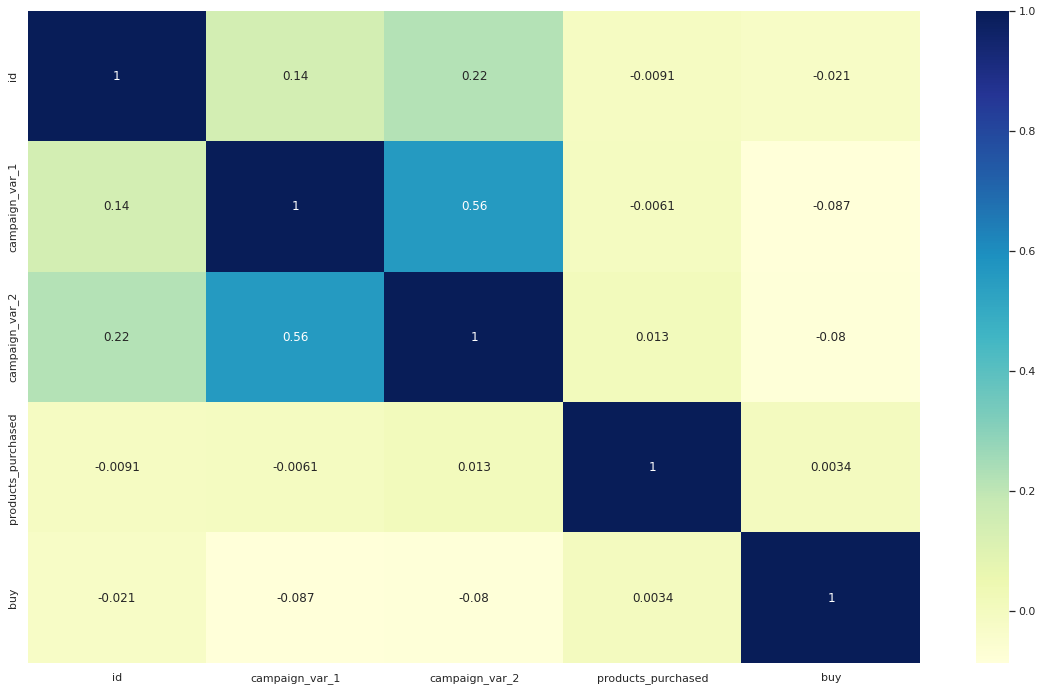

In [57]:
# Set the figure size
plt.figure(figsize=(20,12))

pc_cols=['id','campaign_var_1','campaign_var_2','products_purchased','buy']
# Generate the heatmap
sns.heatmap(train[pc_cols].corr(),cmap='YlGnBu', annot=True)

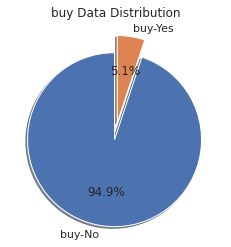

In [60]:
explode = (0.1, 0.1) 
pie_labels = ['buy-No', 'buy-Yes']
pie_sizes_m = train['buy'].value_counts()/len(train.index) * 100
plt.pie(pie_sizes_m, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('buy Data Distribution')

plt.show()


In [62]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [ ]:

import pandas as pd
import numpy as np




# drop all rows with any NaN and NaT values
traindf1 = train.dropna()
print(traindf1)




In [82]:


# Drop the Lead Number, Converted fields to form the X features
X=traindf1.drop(['buy'], axis =1)
X.head()



,id,campaign_var_1,campaign_var_2,products_purchased
0,1,1,2,2.0
1,2,2,1,2.0
2,3,9,3,3.0
3,4,6,7,2.0
4,5,4,6,2.0


In [83]:
# Create the Y variable
y = traindf1['buy']
y.head()


0    0
1    0
2    0
3    0
4    0
Name: buy, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()


In [78]:
import statsmodels.api as sm


In [ ]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

In [91]:
from sklearn.feature_selection import RFE

In [96]:
logreg=LogisticRegression()
rfe=RFE(logreg)
rfe=rfe.fit(X_train,y_train)

In [97]:


rfe.support_



array([False,  True,  True, False])

In [98]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('id', False, 3),
 ('campaign_var_1', True, 1),
 ('campaign_var_2', True, 1),
 ('products_purchased', False, 2)]

In [110]:


col = X_train.columns[rfe.support_]
col



Index(['campaign_var_1', 'campaign_var_2'], dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['id', 'products_purchased'], dtype='object')

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    buy   No. Observations:                27410
Model:                            GLM   Df Residuals:                    27407
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5467.1
Date:                Sun, 05 Jun 2022   Deviance:                       10934.
Time:                        18:09:20   Pearson chi2:                 2.68e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.8585      0.070    -26.661      0.000      -1.995      -1.722
campaign_var_1    -0.0943      0.010     -9.027      0.000      -0.115      -0.074
campaign_var_2    -0.0814      0.013     -6.205      0.000      -0.107      -0.056
==================================================================================
"""

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:


vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif



,Features,VIF
0,campaign_var_1,6.32
1,campaign_var_2,6.32


In [115]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [116]:
y_train_pred[:10]

array([0.09077772, 0.0648646 , 0.10001353, 0.03933723, 0.03446879,
       0.08329183, 0.03185928, 0.02620085, 0.03637304, 0.04887355])

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,0,0.090778,16455
1,0,0.064865,49
2,0,0.100014,4306
3,0,0.039337,25779
4,0,0.034469,33761


In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,0,0.090778,16455,0,9.08
1,0,0.064865,49,0,6.49
2,0,0.100014,4306,0,10.00
3,0,0.039337,25779,0,3.93
4,0,0.034469,33761,0,3.45


In [121]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[25984     0]
 [ 1426     0]]


In [120]:
# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [152]:


# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))



0.9479751915359358


In [123]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [124]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 0.0 %


In [125]:


# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")



Specificity: 100.0 %


In [126]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 0.0 %


In [127]:


# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")



FPR: 100.0 %


In [128]:


# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")



Positive Predictive Power: nan %


In [153]:


# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")



Negative Predictive Power: 94.8 %


In [154]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 94.8 %


In [131]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:


fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )



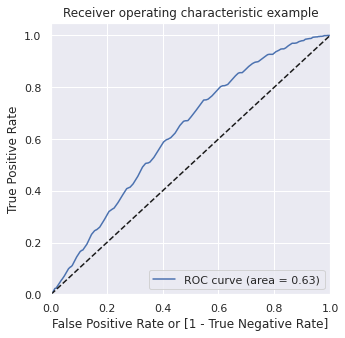

In [133]:


draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)



In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()



,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.090778,16455,0,9.08,1,0,0,0,0,0,0,0,0,0
1,0,0.064865,49,0,6.49,1,0,0,0,0,0,0,0,0,0
2,0,0.100014,4306,0,10.00,1,1,0,0,0,0,0,0,0,0
3,0,0.039337,25779,0,3.93,1,0,0,0,0,0,0,0,0,0
4,0,0.034469,33761,0,3.45,1,0,0,0,0,0,0,0,0,0


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi    speci
0.0   0.0  0.052025  1.000000  0.00000
0.1   0.1  0.925538  0.036466  0.97433
0.2   0.2  0.947975  0.000000  1.00000
0.3   0.3  0.947975  0.000000  1.00000
0.4   0.4  0.947975  0.000000  1.00000
0.5   0.5  0.947975  0.000000  1.00000
0.6   0.6  0.947975  0.000000  1.00000
0.7   0.7  0.947975  0.000000  1.00000
0.8   0.8  0.947975  0.000000  1.00000
0.9   0.9  0.947975  0.000000  1.00000


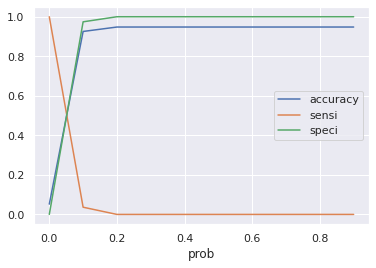

In [136]:


cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()



In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.090778,16455,0,9.08,1,0,0,0,0,0,0,0,0,0,0
1,0,0.064865,49,0,6.49,1,0,0,0,0,0,0,0,0,0,0
2,0,0.100014,4306,0,10.00,1,1,0,0,0,0,0,0,0,0,0
3,0,0.039337,25779,0,3.93,1,0,0,0,0,0,0,0,0,0,0
4,0,0.034469,33761,0,3.45,1,0,0,0,0,0,0,0,0,0,0


In [138]:


# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)



0.9479751915359358

In [139]:


# Create Confusion Matrix again for new threshold
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2



array([[25984,     0],
       [ 1426,     0]])

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [141]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 0.0 %


In [143]:
from sklearn.preprocessing import StandardScaler


In [144]:
scaler = StandardScaler()

In [146]:
X_test.head()

,id,campaign_var_1,campaign_var_2,products_purchased
16111,16112,2,3,2.0
37472,37473,9,10,2.0
14851,14852,4,6,2.0
15895,15896,8,7,2.0
18653,18654,9,5,2.0


In [147]:


X_test[num_vars] = scaler.transform(X_test[num_vars])



KeyError: ignored

In [149]:
y_test.head()

16111    0
37472    0
14851    0
15895    0
18653    0
Name: buy, dtype: int64